In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("data_hack.csv")

In [4]:
data["Class"].value_counts()

Blocker        7531
Non-Blocker    1548
BLINDED          96
Name: Class, dtype: int64

In [5]:
data.shape

(9175, 1106)

In [6]:
data.head()

,Class,ID,Name,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,MW,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,Zagreb
0,Blocker,1,1,69.320204,12,12,61,33,28,0,...,452.205970,7.413213,67.220555,2.036987,25.958931,13.512517,12.446413,3813,55,174
1,Blocker,2,2,11.230793,0,0,7,6,1,0,...,216.837402,30.976772,10.523646,1.753941,12.174358,4.650712,2.872934,29,4,22
2,Blocker,3,3,53.575895,18,18,43,28,15,0,...,375.129552,8.723943,57.473463,2.052624,19.908251,0.000000,14.853987,1902,49,152
3,Blocker,4,4,70.156997,12,12,62,33,29,0,...,457.217698,7.374479,67.530841,2.046389,23.627682,8.242546,10.341877,4028,50,170
4,Blocker,5,5,53.575895,18,18,43,28,15,0,...,375.129552,8.723943,57.473463,2.052624,19.951325,0.000000,14.897061,1902,49,152


In [7]:
name=data.columns
name.shape

(1106,)

In [8]:
new_data=data
new_data.shape

(9175, 1106)

In [9]:
temp=data.isin([0]).sum()
temp

Class            0
ID               0
Name             0
apol             0
naAromAtom     158
              ... 
WTPT-4        1004
WTPT-5         174
WPATH            0
WPOL             0
Zagreb           0
Length: 1106, dtype: int64

In [10]:
import tqdm as tqdm
for i in tqdm.tqdm(range(3,1106)):
    if temp[i]>=7500:
        t=name[i]
        new_data=new_data.drop(t,axis=1)
new_data.shape       

100%|██████████| 1103/1103 [00:01<00:00, 645.41it/s]


(9175, 1046)

In [11]:
new_data=new_data.drop(["ID","Name"],axis=1)
new_data.shape

(9175, 1044)

In [12]:
col=new_data.columns
col=col[1:]
col

Index(['apol', 'naAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nH', 'nC',
       'nN', 'nO', 'nS',
       ...
       'MW', 'AMW', 'WTPT-1', 'WTPT-2', 'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH',
       'WPOL', 'Zagreb'],
      dtype='object', length=1043)

In [13]:
new_data.describe()

,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,...,MW,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,Zagreb
count,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,...,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000,9175.000000
mean,65.147001,14.156403,14.847193,55.869101,30.272916,25.596185,22.851226,3.726213,2.257003,0.251335,...,425.276688,7.710000,62.039598,2.047085,21.652605,6.116208,11.803513,3136.289809,48.556948,162.052970
std,14.658613,5.358060,5.943559,13.362750,6.887781,7.615536,5.304053,1.849182,1.561053,0.486175,...,95.445252,1.191464,14.330162,0.036064,7.846540,4.247286,5.851883,2022.630810,13.655690,39.783141
min,9.646793,0.000000,0.000000,6.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,60.068748,4.596384,6.871320,1.717830,0.000000,0.000000,0.000000,10.000000,1.000000,10.000000
25%,55.745446,12.000000,12.000000,47.000000,26.000000,21.000000,19.000000,2.000000,1.000000,0.000000,...,363.231063,7.083924,52.705738,2.027541,16.169172,2.784217,6.783158,1731.500000,40.000000,136.000000
50%,64.985411,14.000000,15.000000,56.000000,31.000000,25.000000,23.000000,4.000000,2.000000,0.000000,...,426.070799,7.581429,62.672935,2.049695,21.792820,5.578780,11.703741,2825.000000,49.000000,164.000000
75%,73.509411,18.000000,18.000000,64.000000,34.000000,30.000000,26.000000,5.000000,3.000000,0.000000,...,485.248307,8.172934,70.650841,2.071550,26.951364,8.359591,15.843035,4086.000000,57.000000,186.000000
max,148.590373,36.000000,41.000000,139.000000,67.000000,79.000000,50.000000,12.000000,15.000000,4.000000,...,951.402304,37.199571,136.540896,2.158067,53.729644,42.119042,38.629354,27647.000000,142.000000,360.000000


In [14]:
X=new_data.iloc[ :9079 ,1:].values
Y=new_data.iloc[:9079,0].values

In [15]:
print(X.shape)
print(Y.shape)

(9079, 1043)
(9079,)


In [16]:
k=np.where(pd.isnull(X))

In [17]:
k

(array([ 987,  987,  987, ..., 9078, 9078, 9078], dtype=int64),
 array([373, 374, 375, ..., 937, 938, 939], dtype=int64))

In [18]:
column_nan=list(set(k[1]))

In [19]:
l=len(column_nan)
l

600

In [20]:
import tqdm as tqdm
fill_value=[]
for i in tqdm.tqdm((column_nan)):
    c=0
    for j in range(9079):
        if pd.isnull(X[j][i]):
            c=c+0
        else:
            c=c+float(X[j][i])
    fill_value.append(c/9079)
value_dict=dict(zip(column_nan,fill_value))

100%|██████████| 600/600 [00:08<00:00, 72.20it/s]


In [21]:
value_dict.keys()

dict_keys([58, 59, 60, 61, 62, 63, 64, 65, 66, 112, 113, 114, 115, 116, 117, 118, 119, 120, 175, 176, 177, 178, 179, 180, 181, 182, 183, 238, 239, 240, 241, 242, 243, 244, 245, 246, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539

In [22]:
for i in tqdm.tqdm(range(9079)):
    for j in range(1043):
        if pd.isnull(X[i][j]):
            X[i][j]=value_dict[j]

100%|██████████| 9079/9079 [00:09<00:00, 908.76it/s] 


In [23]:
np.where(pd.isnull(X))

(array([], dtype=int64), array([], dtype=int64))

In [24]:
X.shape

(9079, 1043)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7263, 1043)
(1816, 1043)
(7263,)
(1816,)


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [28]:
Y_train=[]
for i in range(7263):
    if y_train[i]=="Blocker":
        Y_train.append(1);
    else:
        Y_train.append(0)
Y_test=[]
for i in range(1816):
    if y_test[i]=="Blocker":
        Y_test.append(1);
    else:
        Y_test.append(0)
                

In [195]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=1)
lda.fit(x_train,Y_train)
x_train=lda.transform(x_train)
x_test=lda.transform(x_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [196]:
lda.explained_variance_ratio_

array([1.])

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

C:\Users\lenovo\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,


In [30]:
Y_train[0]

1

In [159]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
#dtrain1=xgb.DMatrix(X_tr1,y_train)
gbdt=XGBClassifier()
parameters ={"max_depth":[3,4,5,6,7],"n_estimators":[10,50,100,150,200]}
clf1 = GridSearchCV(gbdt, parameters, cv=4,n_jobs=-1,scoring='roc_auc',return_train_score=True)
clf1.fit(x_train,Y_train)
clf1.best_estimator_.get_params()

KeyboardInterrupt: 

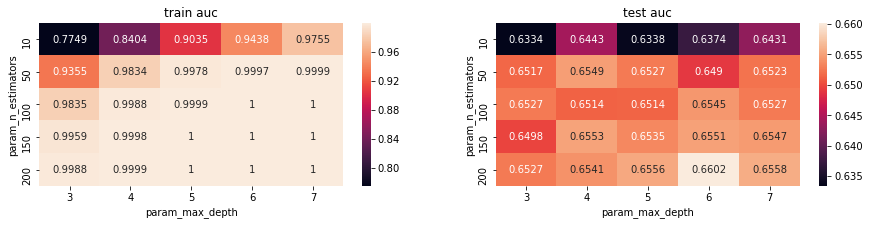

In [128]:
import pandas as pd
import seaborn as sn 
fig=plt.figure(figsize=(15,3))
a=fig.add_subplot(121)
a.set_title("train auc")
result=pd.DataFrame.from_dict(clf1.cv_results_)
max_score=result.groupby(["param_n_estimators","param_max_depth"]).max()
max_score=max_score.unstack()[["mean_test_score","mean_train_score"]]
a=sn.heatmap(max_score.mean_train_score,annot=True,fmt=".4g")
b=fig.add_subplot(122)
b.set_title("test auc")
a=sn.heatmap(max_score.mean_test_score,annot=True,fmt=".4g")

In [31]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

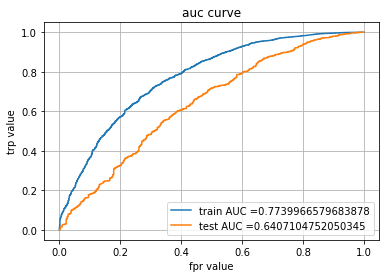

In [32]:
from sklearn.metrics import roc_curve, auc
#gbdt1=Pipeline([("pca",PCA(n_components=10)),("svm",XGBClassifier(max_depth=2,n_estimators=50))])
gbdt1 = XGBClassifier(max_depth=2,n_estimators=30)
gbdt1.fit(x_train, Y_train)


y_train_pred1 = batch_predict(gbdt1, x_train)    
y_test_pred1= batch_predict(gbdt1, x_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred1)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr value")
plt.ylabel("trp value")
plt.title("auc curve")
plt.grid()
plt.show()

In [33]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    #print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Text(570.5454545454544, 0.5, 'actual')

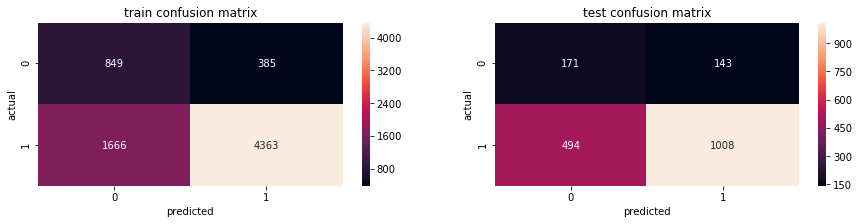

In [34]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
k=confusion_matrix(Y_train, predict_with_best_t(y_train_pred1, best_t))
fig=plt.figure(figsize=(15,3))
a=fig.add_subplot(121)
a=sn.heatmap(k,annot=True,yticklabels=[0,1],xticklabels=[0,1],fmt="g")
a.set_title("train confusion matrix")
a.set_xlabel("predicted")
a.set_ylabel("actual")
b=fig.add_subplot(122)
y_pred=predict_with_best_t(y_test_pred1, best_t)
c_test=confusion_matrix(Y_test, y_pred)
b=sn.heatmap(c_test,annot=True,yticklabels=[0,1],xticklabels=[0,1],fmt="g")
b.set_title("test confusion matrix")
b.set_xlabel("predicted")
b.set_ylabel("actual")

In [35]:
k[0][1]

385

In [36]:
y_pred=gbdt1.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("accuracy"+str(accuracy_score(Y_test,y_pred)))

accuracy0.829295154185022


In [38]:
n=c_test[0][0]+c_test[1][1]
d=len(x_test)
print("CCR=",n/d)

CCR= 0.6492290748898678


In [39]:
train_sensitivity=k[1][1]/(k[1][1]+k[0][1])
print("train sensitivity=",train_sensitivity*100,"%")
test_sensitivity=c_test[1][1]/(c_test[1][1]+c_test[0][1])
print("test sensitivity=",test_sensitivity*100,"%")

train sensitivity= 91.89132266217355 %
test sensitivity= 87.57602085143354 %


In [40]:
train_specificity=k[0][0]/(k[0][0]+k[1][0])
print("train specificity=",train_specificity*100,"%")
test_specificity=c_test[0][0]/(c_test[0][0]+c_test[1][0])
print("test specificity=",test_specificity*100,"%")

train specificity= 33.75745526838966 %
test specificity= 25.71428571428571 %


In [41]:
train_g_mean=(train_sensitivity*train_specificity)**1/2
print("train G mean=",train_g_mean)
test_g_mean=(test_sensitivity*test_specificity)**1/2
print("train G mean=",test_g_mean)

train G mean= 0.15510086071607423
train G mean= 0.11259774109470025


In [42]:
train_pre=k[1][1]/(k[1][1]+k[1][0])
print("train precision=",train_pre)
test_pre=c_test[1][1]/(c_test[1][1]+c_test[1][0])
print("test precision=",test_pre)

train precision= 0.7236689334881407
test precision= 0.6711051930758988


In [43]:
train_f_me=(2*train_pre*train_sensitivity)/(train_pre+train_sensitivity)
print("train f measure=",train_f_me)
test_f_me=(2*test_pre*test_sensitivity)/(test_pre+test_sensitivity)
print("test f measure=",test_f_me)

train f measure= 0.8096872970214346
test f measure= 0.7598944591029024


In [44]:
from sklearn.metrics import matthews_corrcoef
train_MCC=matthews_corrcoef(Y_train, predict_with_best_t(y_train_pred1, best_t))
print("train MCC=",train_MCC)
test_MCC=matthews_corrcoef(Y_test, y_pred)
print("test MCC=",test_MCC)

train MCC= 0.32494570833477965
test MCC= 0.12240358027733891


In [45]:
from sklearn.metrics import cohen_kappa_score
train_k=cohen_kappa_score(Y_train, predict_with_best_t(y_train_pred1, best_t))
print("train cohen's kappa=",train_k)
test_k=cohen_kappa_score(Y_test, y_pred)
print("test cohen's kappa=",test_k)

train cohen's kappa= 0.29138824164265875
test cohen's kappa= 0.05600643906365277


In [46]:
blind_test=new_data.iloc[9078:-1 ,1:].values

In [47]:
blind_test.shape

(96, 1043)

In [48]:
blind_test[0]

array([  63.756204,   12.      ,   12.      , ..., 2204.      ,
         45.      ,  150.      ])

In [49]:
y_blinded=gbdt1.predict(blind_test)

In [50]:
d=pd.DataFrame(y_blinded)

In [51]:
d

,0
0,1
1,1
2,1
3,0
4,1
...,...
91,1
92,0
93,1
94,0


In [52]:
d[0].value_counts()

1    70
0    26
Name: 0, dtype: int64

In [53]:
d.to_csv("blinded.csv")

In [83]:
new_data.columns

Index(['Class', 'apol', 'naAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nH',
       'nC', 'nN', 'nO',
       ...
       'MW', 'AMW', 'WTPT-1', 'WTPT-2', 'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH',
       'WPOL', 'Zagreb'],
      dtype='object', length=1044)

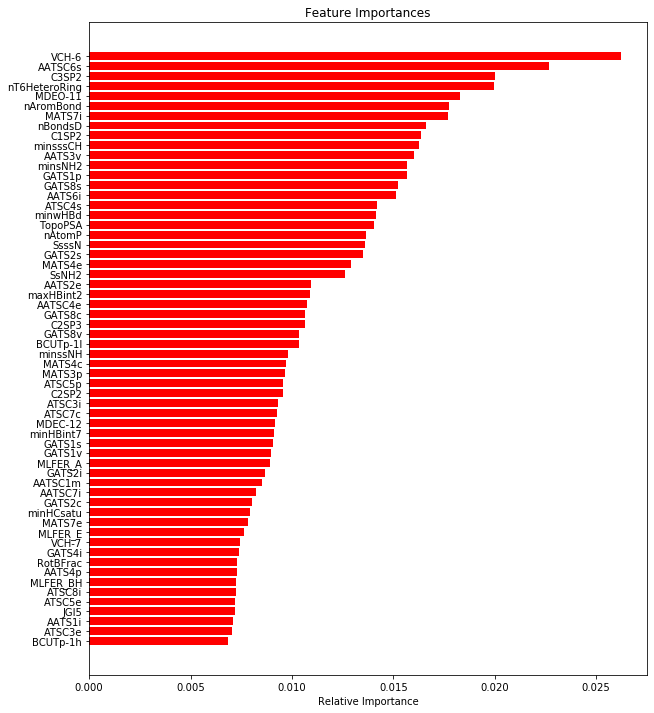

In [84]:
features = new_data.columns
importances = gbdt1.feature_importances_
indices = (np.argsort(importances))[-60:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i+1] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [396]:
imp=[features[i] for i in indices]

In [397]:
for i in new_data.columns:
    if i not in imp and i!="Class":
        new_data=new_data.drop(i,axis=1)

In [398]:
new_data.shape

(9175, 61)

In [399]:
new_data.columns

Index(['Class', 'apol', 'ATS6m', 'ATS7e', 'ATS6i', 'ATS0s', 'AATS2v', 'ATSC3c',
       'ATSC0m', 'ATSC5v', 'ATSC3i', 'ATSC7i', 'ATSC8i', 'ATSC2s', 'ATSC3s',
       'AATSC5c', 'AATSC6v', 'AATSC3e', 'AATSC4e', 'AATSC5e', 'AATSC8e',
       'AATSC5s', 'MATS4c', 'MATS8c', 'MATS8v', 'MATS8i', 'MATS3s', 'MATS6s',
       'GATS3c', 'GATS7c', 'GATS2p', 'SM1_Dzi', 'VE1_Dzs', 'nBondsS3', 'bpol',
       'SpMin1_Bhm', 'SpMax3_Bhp', 'SpMax3_Bhs', 'SpMin8_Bhs', 'C1SP2',
       'C2SP2', 'VCH-5', 'VCH-6', 'Mi', 'CrippenMR', 'SpMax_Dt', 'VE2_Dt',
       'SwHBa', 'SaaCH', 'maxHssNH', 'maxssCH2', 'gmin', 'ETA_Epsilon_4',
       'BIC4', 'MIC0', 'piPC10', 'TpiPC', 'nT5HeteroRing', 'JGI8', 'VE1_D',
       'VR3_D'],
      dtype='object')

In [403]:
X=new_data.iloc[ :9079 ,1:].values
Y=new_data.iloc[:9079,0].values

In [404]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [405]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7263, 60)
(1816, 60)
(7263,)
(1816,)


In [407]:
Y_train=[]
for i in range(7263):
    if y_train[i]=="Blocker":
        Y_train.append(1);
    else:
        Y_train.append(0)
Y_test=[]
for i in range(1816):
    if y_test[i]=="Blocker":
        Y_test.append(1);
    else:
        Y_test.append(0)
                

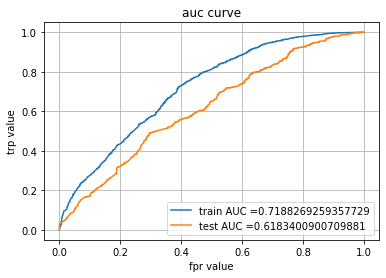

In [408]:
from sklearn.metrics import roc_curve, auc

gbdt1 = XGBClassifier(max_depth=3,n_estimators=10)
gbdt1.fit(x_train, Y_train)

y_train_pred1 = batch_predict(gbdt1, x_train)    
y_test_pred1= batch_predict(gbdt1, x_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred1)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr value")
plt.ylabel("trp value")
plt.title("auc curve")
plt.grid()
plt.show()

Text(570.5454545454544, 0.5, 'actual')

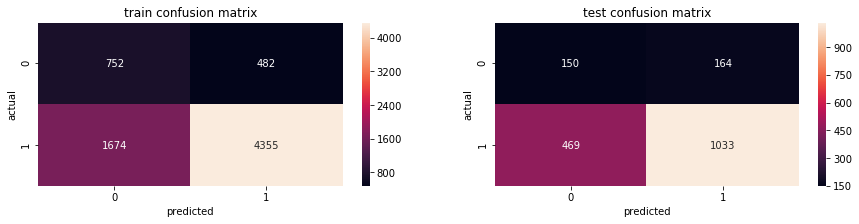

In [409]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
k=confusion_matrix(Y_train, predict_with_best_t(y_train_pred1, best_t))
fig=plt.figure(figsize=(15,3))
a=fig.add_subplot(121)
a=sn.heatmap(k,annot=True,yticklabels=[0,1],xticklabels=[0,1],fmt="g")
a.set_title("train confusion matrix")
a.set_xlabel("predicted")
a.set_ylabel("actual")
b=fig.add_subplot(122)
y_pred=predict_with_best_t(y_test_pred1, best_t)
c_test=confusion_matrix(Y_test, y_pred)
b=sn.heatmap(c_test,annot=True,yticklabels=[0,1],xticklabels=[0,1],fmt="g")
b.set_title("test confusion matrix")
b.set_xlabel("predicted")
b.set_ylabel("actual")

In [410]:
y_pred=gbdt1.predict(x_test)
print("accuracy"+str(accuracy_score(Y_test,y_pred)))

accuracy0.8309471365638766
